In [4816]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso
import seaborn as sns

In [4817]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_seq_items', None)

Import Order Lines Dataset

In [4818]:
df_order_lines = pd.read_excel('Data/order_lines.xlsx')
df_order_lines.head()

,Date,Warehouse Code,Customer Code,Order Number,Order Line Number,Item Code,Units,Rupees
0,2021-11-15,37518,5002915-15,20247100,1,963543-43,2,381.47
1,2021-05-02,32188,5397843-43,20258239,1,8902753-53,250,187.03
2,2021-12-13,30977,5340669-69,20203388,2,8308591-91,500,452.45
3,2021-03-24,31163,5340672-72,20203383,3,8308621-21,500,452.45
4,2021-09-11,39526,5029913-13,20258208,4,8022921-21,400,567.16


Import Unit of Measurement Conversions Dataset

In [4819]:
df_units_of_measurement = pd.read_excel('Data/uom_conversions.xlsx')
df_units_of_measurement.head()

,Item Code,Conversion Ratio
0,995097-97,0.0242
1,995096-96,0.0242
2,8949591-91,0.0474
3,952547-47,0.0368
4,866370-70,0.0400


Join Order Lines and Unit of Measurement Conversions on Item Code

In [4820]:
join_by = ['Item Code']
df_join = pd.merge(df_order_lines, df_units_of_measurement, on=join_by, how='left', suffixes=('', '_y'))
df_join.head()

,Date,Warehouse Code,Customer Code,Order Number,Order Line Number,Item Code,Units,Rupees,Conversion Ratio
0,2021-11-15,37518,5002915-15,20247100,1,963543-43,2,381.47,56.58400
1,2021-05-02,32188,5397843-43,20258239,1,8902753-53,250,187.03,0.03200
2,2021-12-13,30977,5340669-69,20203388,2,8308591-91,500,452.45,0.02219
3,2021-03-24,31163,5340672-72,20203383,3,8308621-21,500,452.45,0.02219
4,2021-09-11,39526,5029913-13,20258208,4,8022921-21,400,567.16,0.03200


Import Distances Dataset

In [4821]:
df_distances = pd.read_excel('Data/distances.xlsx')
df_distances

,Warehouse Code,Warehouse Name,Warehouse City,Customer Code,Customer City,Road,Rail,Air
0,37518,WH CHENNAI,CHENNAI,5002915-15,COIMBATORE,505.70,0.0,0.0
1,32188,WH BANGALORE,BANGALORE,5397843-43,MANGALORE,350.60,0.0,0.0
2,30977,WH MUMBAI,MUMBAI,5340669-69,NAGPUR,0.00,770.1,0.0
3,31163,WH KOCHI,KOCHI,5340672-72,TRIVANDRUM,199.40,0.0,0.0
4,39526,WH HYDERABAD,HYDERABAD,5029913-13,WARANGAL,0.00,158.2,0.0
5,30447,WH NOIDA,NOIDA,5003451-51,AGRA,201.00,0.0,0.0
6,37552,WH KOLKATA,KOLKATA,5293132-32,GUWAHATI,353.59,0.0,1010.2
7,30492,WH VISAKHAPATNAM,VISAKHAPATNAM,5003269-69,AMARAVATI,362.40,0.0,0.0
8,32515,WH AHMEDABAD,AHMEDABAD,5003474-74,SURAT,0.00,266.8,0.0
9,34192,WH INDORE,INDORE,5003476-76,BHOPAL,194.10,0.0,0.0


Join Order Lines and UOM dataset with Distances on Warehouse Code and Customer Code

Calculate the weight of the order by multiplying units ordered withConversion Ratio

In [4822]:
join_by = ['Warehouse Code', 'Customer Code']
df_join = pd.merge(df_join, df_distances, on=join_by, how='left', suffixes=('','_y'))
df_join.drop(df_join.filter(regex='_y$').columns.tolist())
df_join['Kg'] = df_join['Units'] * df_join['Conversion Ratio']
df_join.head()

,Date,Warehouse Code,Customer Code,Order Number,Order Line Number,Item Code,Units,Rupees,Conversion Ratio,Warehouse Name,Warehouse City,Customer City,Road,Rail,Air,Kg
0,2021-11-15,37518,5002915-15,20247100,1,963543-43,2,381.47,56.58400,WH CHENNAI,CHENNAI,COIMBATORE,505.7,0.0,0.0,113.168
1,2021-05-02,32188,5397843-43,20258239,1,8902753-53,250,187.03,0.03200,WH BANGALORE,BANGALORE,MANGALORE,350.6,0.0,0.0,8.000
2,2021-12-13,30977,5340669-69,20203388,2,8308591-91,500,452.45,0.02219,WH MUMBAI,MUMBAI,NAGPUR,0.0,770.1,0.0,11.095
3,2021-03-24,31163,5340672-72,20203383,3,8308621-21,500,452.45,0.02219,WH KOCHI,KOCHI,TRIVANDRUM,199.4,0.0,0.0,11.095
4,2021-09-11,39526,5029913-13,20258208,4,8022921-21,400,567.16,0.03200,WH HYDERABAD,HYDERABAD,WARANGAL,0.0,158.2,0.0,12.800


Ordering the Columns

In [4823]:
gpby_order = ['Date', 
        'Warehouse Code', 'Warehouse Name', 'Warehouse City',
        'Customer Code', 'Customer City', 
        'Road', 'Rail', 'Air',
        'Order Number', 'Order Line Number', 'Item Code', 'Conversion Ratio']
df_grouped = pd.DataFrame(df_join.groupby(gpby_order)[['Units', 'Kg']].sum())
df_grouped.reset_index(inplace = True)
df_grouped.head()

,Date,Warehouse Code,Warehouse Name,Warehouse City,Customer Code,Customer City,Road,Rail,Air,Order Number,Order Line Number,Item Code,Conversion Ratio,Units,Kg
0,2021-01-09,30447,WH NOIDA,NOIDA,5003451-51,AGRA,201.0,0.0,0.0,21000061,5,8128704-04,0.02092,400,8.36800
1,2021-01-19,34192,WH INDORE,INDORE,5003476-76,BHOPAL,194.1,0.0,0.0,20605097,9,8308601-01,0.02219,200,4.43800
2,2021-02-11,38454,WH KOLKATA,KOLKATA,5494889-89,GANGTOK,0.0,0.0,692.0,20478515,5,802077-77,0.01900,960,18.24000
3,2021-03-13,30492,WH VISAKHAPATNAM,VISAKHAPATNAM,5003269-69,AMARAVATI,362.4,0.0,0.0,20761978,7,888751-51,0.04767,96,4.57632
4,2021-03-19,39040,WH KOCHI,KOCHI,5262267-67,CALICUT,0.0,182.0,0.0,20930844,6,9202962-62,0.09150,375,34.31250


Calculate CO2 Emissions

In [4824]:
dict_co2e = dict(zip(['Air', 'Road', 'Rail'], [2.1, 0.096, 0.028]))
MODES = ['Road', 'Rail', 'Air']
for mode in MODES:
    df_grouped['CO2 '+ mode] = df_grouped['Kg'].astype(float)/1000 * df_grouped[mode].astype(float) * dict_co2e[mode]

df_grouped['CO2 Total'] = df_grouped[['CO2 '+ mode for mode in MODES]].sum(axis=1)
df_grouped['Date'] = pd.to_datetime(df_grouped['Date'])
df_grouped['Year'] = df_grouped['Date'].dt.year
df_grouped['Month'] = df_grouped['Date'].dt.month
df_grouped['Day'] = df_grouped['Date'].dt.day
df_grouped = df_grouped.drop(['Date'], axis=1)
df_grouped.to_excel('Data/output.xlsx')    

Predictions of CO2 Emissions using Polynomial Regression

In [4825]:
X = df_grouped[['Year', 'Month', 'Day', 'Road', 'Kg']]
y = df_grouped['CO2 Road']

<AxesSubplot:>

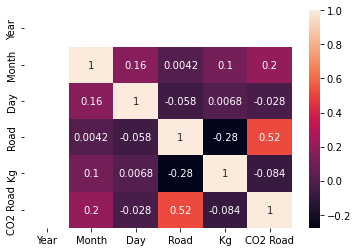

In [4826]:
sns.heatmap(df_grouped[['Year', 'Month', 'Day', 'Road', 'Kg', 'CO2 Road']].corr(), annot=True)

<AxesSubplot:>

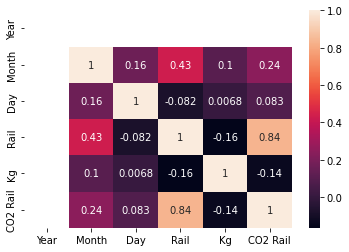

In [4827]:
sns.heatmap(df_grouped[['Year', 'Month', 'Day', 'Rail', 'Kg', 'CO2 Rail']].corr(), annot=True)

<AxesSubplot:>

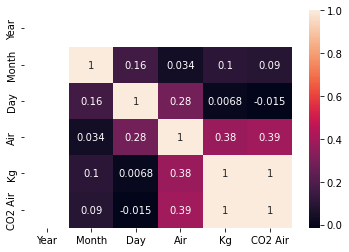

In [4828]:
sns.heatmap(df_grouped[['Year', 'Month', 'Day', 'Air', 'Kg', 'CO2 Air']].corr(), annot=True)

Train and Test Split

In [4829]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Create Regression Model

In [4830]:
poly_features = PolynomialFeatures(degree = 3)
X_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

LinearRegression()

Predictions

In [4831]:
new_data = pd.DataFrame({
    'Year': [2022],
    'Month':[4],
    'Day': [2],
    'Road': [500],
    'Kg': [500]
})
future_X_poly = poly_features.transform(new_data)
future_y_pred = poly_model.predict(future_X_poly)
new_data['Predicted CO2 Emissions using Regression'] = future_y_pred

Ridge Regularization

In [4832]:
ridge_model = make_pipeline(PolynomialFeatures(3), Ridge(alpha=0.01))
ridge_model.fit(X_poly, y_train)
predictions_ridge = ridge_model.predict(future_X_poly)
new_data['Predicted CO2 Emissions using Ridge Regularization'] = predictions_ridge

c:\Users\rgoku\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Lasso Regularization

In [4833]:
lasso_model = make_pipeline(PolynomialFeatures(3), Lasso(alpha=0.01))
lasso_model.fit(X_poly, y_train)
predictions_lasso = lasso_model.predict(future_X_poly)
new_data['Predicted CO2 Emissions using Lasso Regularization'] = predictions_lasso

Average of Predictions

In [4834]:
new_data['Average'] = (new_data['Predicted CO2 Emissions using Regression'] + new_data['Predicted CO2 Emissions using Ridge Regularization'] + new_data['Predicted CO2 Emissions using Lasso Regularization'])/ 3
new_data.to_excel('Data/predictions.xlsx')